In [176]:
from selenium.webdriver import Chrome
import time
import sqlite3
from pandas.io import sql
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [177]:
from matplotlib import font_manager,rc
font_location = 'C:\Windows\Fonts\gulim.ttc'
font_name= font_manager.FontProperties(fname = font_location).get_name()
rc('font',family = font_name)

In [178]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized");

browser = webdriver.Chrome("chromedriver", options=options)

In [179]:
browser.get("https://democracy.seoul.go.kr/cso/etc/search_result.jsp?collection=suggest_free&searchBar_sort=ALL&queryStr=%EB%B6%88%EB%B2%95%EC%A3%BC%EC%A0%95%EC%B0%A8&query=%EB%B6%88%EB%B2%95%EC%A3%BC%EC%A0%95%EC%B0%A8")
browser.implicitly_wait(5)

In [180]:
articleListst = []
for i in range(1,7):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

for i in range(3,9):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

for i in range(3,8):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

articleList

,NO
0,서울계남초교앞 사거리에 대각선(X자형)횡단보도 설치를 제안합니다.\n서울계남초교앞 ...
0,아이들 안전한 등하교길을 만들어주세요\n안녕하세요 저는 두아이를 둔 아이엄마입니다....
0,공유 전동 킥보드의 주차 문제에 대해 제안합니다.\n안녕하세요. 저는 서울시 내 공...
0,전동 킥보드 주차공간 확대\n안녕하세요. 저는 서울 소재 고등학교에 재학 중인 학생...
0,서울계남초교앞 사거리에 대각선(X자형)횡단보도 설치를 제안합니다.\n서울계남초교앞 ...
...,...
0,서울시 주택가 이면도로 편도 1차선이상 도로에 중앙분리대 설치\n◆ 현황 및 문제점...
0,(골목길 긴급차량 출동을 위한 공간 확보 등) 필로티 건물(다세대주택 등) 주거지 ...
0,"󰂐불법주정차단속지역,횡단보도상에 LED유도등설치하자\n불법주정차특별단속지역에 황색선..."
0,주정차 방법 관련 성숙한 시민의식을 보이자\n차량을 운전하고 다니다보면 이곳저곳등에...


In [181]:
#데이터 처리(한글, 공백 제외)
import re

In [182]:
#데이터 처리(한글, 공백 제외)
articleList["NO"] = articleList["NO"].apply(lambda x: re.sub("[^가-힣\s]","",x))
articleList

,NO
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...
0,아이들 안전한 등하교길을 만들어주세요\n안녕하세요 저는 두아이를 둔 아이엄마입니다 ...
0,공유 전동 킥보드의 주차 문제에 대해 제안합니다\n안녕하세요 저는 서울시 내 공유 ...
0,전동 킥보드 주차공간 확대\n안녕하세요 저는 서울 소재 고등학교에 재학 중인 학생입...
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...
...,...
0,서울시 주택가 이면도로 편도 차선이상 도로에 중앙분리대 설치\n 현황 및 문제점서울...
0,골목길 긴급차량 출동을 위한 공간 확보 등 필로티 건물다세대주택 등 주거지 주차장 ...
0,불법주정차단속지역횡단보도상에 유도등설치하자\n불법주정차특별단속지역에 황색선으로 설치...
0,주정차 방법 관련 성숙한 시민의식을 보이자\n차량을 운전하고 다니다보면 이곳저곳등에...


In [183]:
#공백 row 삭제
articleList = articleList[articleList["NO"].apply(lambda x: re.sub("[^가-힣]","",x)) !=""]
articleList

,NO
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...
0,아이들 안전한 등하교길을 만들어주세요\n안녕하세요 저는 두아이를 둔 아이엄마입니다 ...
0,공유 전동 킥보드의 주차 문제에 대해 제안합니다\n안녕하세요 저는 서울시 내 공유 ...
0,전동 킥보드 주차공간 확대\n안녕하세요 저는 서울 소재 고등학교에 재학 중인 학생입...
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...
...,...
0,서울시 주택가 이면도로 편도 차선이상 도로에 중앙분리대 설치\n 현황 및 문제점서울...
0,골목길 긴급차량 출동을 위한 공간 확보 등 필로티 건물다세대주택 등 주거지 주차장 ...
0,불법주정차단속지역횡단보도상에 유도등설치하자\n불법주정차특별단속지역에 황색선으로 설치...
0,주정차 방법 관련 성숙한 시민의식을 보이자\n차량을 운전하고 다니다보면 이곳저곳등에...


In [184]:
#단어 추출 및 빈도 수 구하기

!pip install soynlp

In [185]:
#WordExtractor로 단어 점수 학습
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(articleList["NO"].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 0.181 Gby 0.180 Gb
all cohesion probabilities was computed. # words = 129
all branching entropies was computed # words = 6240
all accessor variety was computed # words = 6240


{'차': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.7142650180704835, right_branching_entropy=2.330979058408413, left_accessor_variety=35, right_accessor_variety=26, leftside_frequency=764, rightside_frequency=709),
 '것': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.5578379257215835, right_branching_entropy=-0.0, left_accessor_variety=7, right_accessor_variety=1, leftside_frequency=189, rightside_frequency=0),
 '길': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.5833996609191268, right_branching_entropy=1.969770382167092, left_accessor_variety=5, right_accessor_variety=8, leftside_frequency=0, rightside_frequency=124),
 '기': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.315846683934902, right_branching_entropy=1.7420378265167358, left_accessor_variety=11, right_accessor_variety=8, leftside_frequency=254, rightside_frequency=189),
 '게': Scores(cohesion_forward=0, cohesion_backward

In [186]:
#Tokenizer (L-R 분리)
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [187]:
articleList["tokenizer"] = articleList["NO"].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
articleList

,NO,tokenizer
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...,"[서울, 사거리에, 대각선자형횡단보도, 설치, 제안합니다, 서울, 사거리에, 대각선..."
0,아이들 안전한 등하교길을 만들어주세요\n안녕하세요 저는 두아이를 둔 아이엄마입니다 ...,"[아이들, 안전, 등하교길을, 만들어주세요, 안녕하, 저는, 두아이를, 둔, 아이,..."
0,공유 전동 킥보드의 주차 문제에 대해 제안합니다\n안녕하세요 저는 서울시 내 공유 ...,"[공유, 전동, 킥보드, 주차, 문제, 대해, 제안합니다, 안녕하, 저는, 서울, ..."
0,전동 킥보드 주차공간 확대\n안녕하세요 저는 서울 소재 고등학교에 재학 중인 학생입...,"[전동, 킥보드, 주차, 확대, 안녕하, 저는, 서울, 소재, 고등학교에, 재학, ..."
0,서울계남초교앞 사거리에 대각선자형횡단보도 설치를 제안합니다\n서울계남초교앞 사거리에...,"[서울, 사거리에, 대각선자형횡단보도, 설치, 제안합니다, 서울, 사거리에, 대각선..."
...,...,...
0,서울시 주택가 이면도로 편도 차선이상 도로에 중앙분리대 설치\n 현황 및 문제점서울...,"[서울, 주택가, 이면도로, 편도, 차선이상, 도로, 중앙분리대, 설치, 현황, 및..."
0,골목길 긴급차량 출동을 위한 공간 확보 등 필로티 건물다세대주택 등 주거지 주차장 ...,"[골목길, 긴급차량, 출동을, 위한, 공간, 확보, 등, 필로티, 건물다세대주택, ..."
0,불법주정차단속지역횡단보도상에 유도등설치하자\n불법주정차특별단속지역에 황색선으로 설치...,"[불법, 유도등설치하자, 불법, 황색선으로, 설치, 무시하고, 불법, 주정차, 사례..."
0,주정차 방법 관련 성숙한 시민의식을 보이자\n차량을 운전하고 다니다보면 이곳저곳등에...,"[주정차, 방법, 관련, 성숙한, 시민, 보이자, 차량, 운전, 다니다보면, 이곳저..."


In [188]:
words = []
for i in articleList["tokenizer"].values:
    for k in i:
        words.append(k)
words

['서울',
 '사거리에',
 '대각선자형횡단보도',
 '설치',
 '제안합니다',
 '서울',
 '사거리에',
 '대각선자형횡단보도',
 '설치',
 '제안합니다',
 '봉영여중',
 '계남초개',
 '학교',
 '총',
 '여명',
 '학생들의등하교시',
 '교통',
 '위험',
 '낮추기',
 '위하여',
 '계남초교',
 '앞',
 '사거리에',
 '대각선자형횡단보도를',
 '신설하여',
 '주시기',
 '바랍니다상기',
 '개',
 '학교',
 '중',
 '상당수의',
 '학생들이목동로길',
 '맞은편목동신시가지아파트',
 '단지',
 '쪽에서',
 '등하교를',
 '하고',
 '있으며학교',
 '접근을위해서는',
 '계남초교앞',
 '사거리에',
 '횡단',
 '개를',
 '반드시',
 '연속하여',
 '건너야만합니다',
 '그러나',
 '시간에',
 '쫓기는',
 '학생들이',
 '점멸신호',
 '중에',
 '뛰어가다',
 '사고',
 '위험',
 '노출되어',
 '아찔한',
 '순간이',
 '아이들',
 '안전',
 '등하교길을',
 '만들어주세요',
 '안녕하',
 '저는',
 '두아이를',
 '둔',
 '아이',
 '이곳은',
 '성산동',
 '성산',
 '이편한세상',
 '차',
 '앞이에요보시다시피',
 '우리',
 '아이들',
 '이길을',
 '지나야',
 '학교',
 '갈수',
 '있는',
 '양쪽으로',
 '주차',
 '있는',
 '차량',
 '멀리보이는',
 '아파트',
 '담벼락',
 '아래로',
 '불법',
 '주차',
 '차량',
 '인해',
 '이편한세상차에',
 '사는',
 '아이들',
 '통학로가',
 '매일',
 '막혀있습니다차량때문에',
 '더',
 '아이들',
 '사람들이',
 '걸을수가',
 '없는',
 '상태구요',
 '매번',
 '주차',
 '벌인다',
 '하더라도',
 '한계가',
 '있습니다',
 '구청민원실에서는',
 '길이',
 '좁아',
 '인도설치가',
 '힘들다는',
 '답변',
 '받았구요',
 

In [189]:
len(words)

37566

In [190]:
from collections import Counter
cnt = Counter(words)
words = dict(cnt)
words

{'서울': 379,
 '사거리에': 100,
 '대각선자형횡단보도': 32,
 '설치': 257,
 '제안합니다': 100,
 '봉영여중': 16,
 '계남초개': 16,
 '학교': 138,
 '총': 16,
 '여명': 16,
 '학생들의등하교시': 16,
 '교통': 211,
 '위험': 151,
 '낮추기': 16,
 '위하여': 16,
 '계남초교': 16,
 '앞': 63,
 '대각선자형횡단보도를': 16,
 '신설하여': 16,
 '주시기': 16,
 '바랍니다상기': 16,
 '개': 34,
 '중': 70,
 '상당수의': 16,
 '학생들이목동로길': 16,
 '맞은편목동신시가지아파트': 16,
 '단지': 16,
 '쪽에서': 18,
 '등하교를': 16,
 '하고': 214,
 '있으며학교': 16,
 '접근을위해서는': 16,
 '계남초교앞': 16,
 '횡단': 142,
 '개를': 16,
 '반드시': 16,
 '연속하여': 16,
 '건너야만합니다': 16,
 '그러나': 16,
 '시간에': 16,
 '쫓기는': 16,
 '학생들이': 16,
 '점멸신호': 16,
 '중에': 16,
 '뛰어가다': 16,
 '사고': 43,
 '노출되어': 16,
 '아찔한': 16,
 '순간이': 16,
 '아이들': 100,
 '안전': 104,
 '등하교길을': 16,
 '만들어주세요': 25,
 '안녕하': 102,
 '저는': 66,
 '두아이를': 16,
 '둔': 16,
 '아이': 16,
 '이곳은': 16,
 '성산동': 16,
 '성산': 16,
 '이편한세상': 16,
 '차': 25,
 '앞이에요보시다시피': 16,
 '우리': 16,
 '이길을': 16,
 '지나야': 16,
 '갈수': 16,
 '있는': 244,
 '양쪽으로': 25,
 '주차': 975,
 '차량': 433,
 '멀리보이는': 16,
 '아파트': 52,
 '담벼락': 16,
 '아래로': 16,
 '불법': 979,
 '인해': 108,
 '이편

In [191]:
#워드클라우드로 시각화 진행
from wordcloud import WordCloud
wordcloud = WordCloud(height = 500, width=500,background_color="white")\
                      .generate_from_frequencies(words)

In [193]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words)


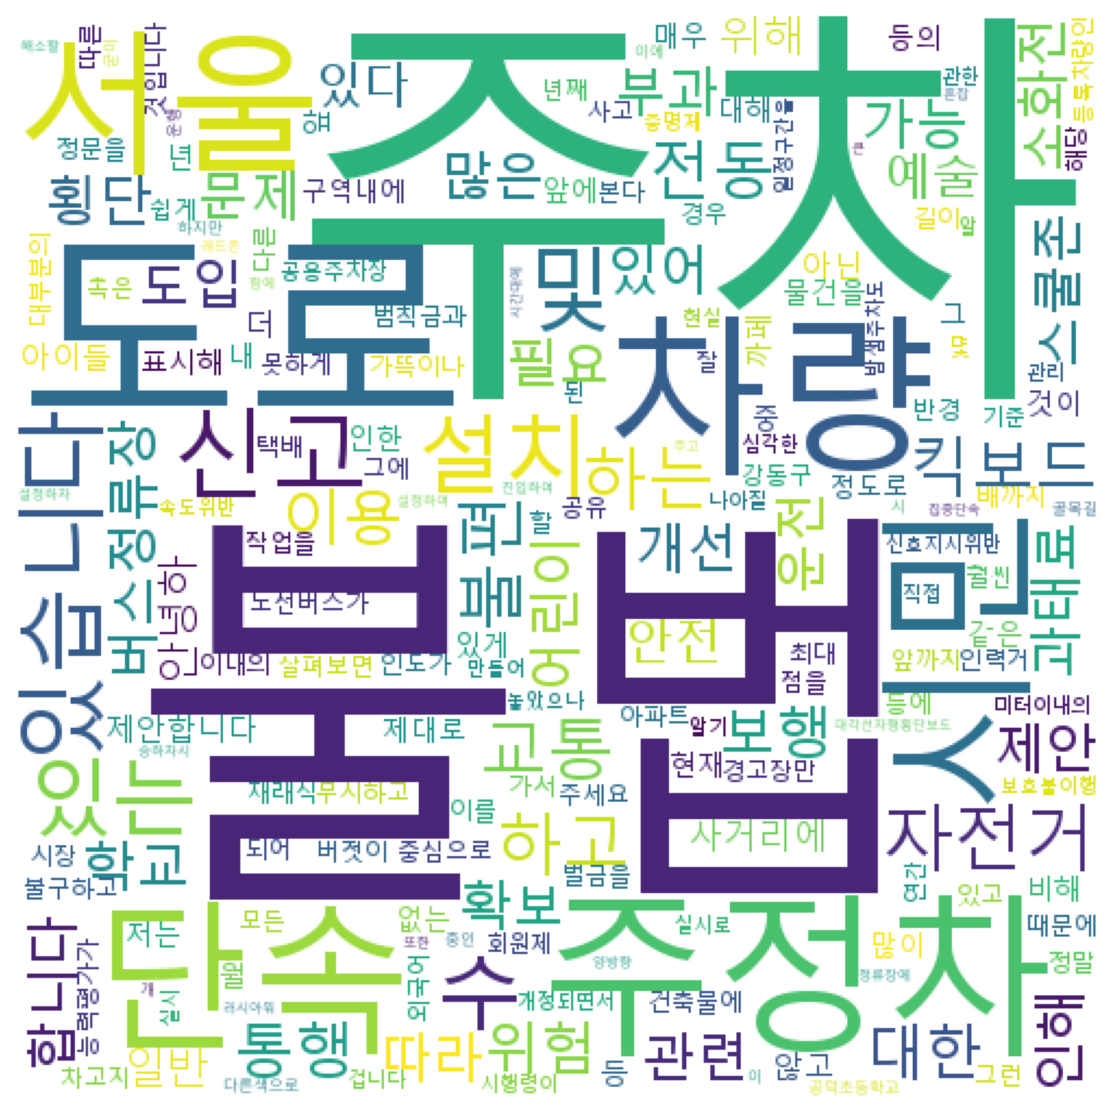

In [194]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()